**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 01/04/2025**

**Time: 12:30 PM**

# **K-means clustering**

**(1) Implementing K means for clustering in images.**

Dataset: (https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500)

Handling image data: (https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/)

Reference article: (https://www.sciencedirect.com/science/article/pii/S1877050915014143)

  a. Reshape the image data for clustering.

  b. Select an appropriate value of K (number of clusters) and apply the K-Means algorithm.

  c. Reconstruct the image using clustered labels.

  d. Compare segmentation results for different values of K. (use boundary displacement error as performance metric)

**(2) How does the choice of K affect the segmentation results?**

**(3) What are the limitations of using K-Means for image segmentation?**

In [1]:
# import libraries
import numpy as np  # For numerical operations
import cv2  # For image processing
import matplotlib.pyplot as plt  # For visualization
from sklearn.cluster import KMeans  # For K-Means clustering
import os  # For directory operations
from PIL import Image  # For image loading and manipulation

**(1) Implementing K means for clustering in images.**

In [2]:
# Define image path (change as needed)

image_directory = r"/content/dataset/images/train"

# Initialize a list to store loaded images
images = []

# Load images from the directory
for i, filename in enumerate(os.listdir(image_directory)):
       if i >= 10:  # Limit to 10 images
           break
       if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
           image_path = os.path.join(image_directory, filename)
           image = cv2.imread(image_path)
           if image is not None:
               images.append(image)

# Convert images to RGB format for consistency
images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

# Display the number of images loaded
print(f"Loaded {len(images_rgb)} images from the directory.")

Loaded 10 images from the directory.


**Preprocess Images**

In [3]:
# Normalize the images and reshape them for clustering
images_normalized = []  # List to store normalized images
images_reshaped = []  # List to store reshaped images

for image in images_rgb:
    # Normalize the image to the range [0, 1]
    image_normalized = image / 255.0
    images_normalized.append(image_normalized)

    # Reshape the image into a 2D array where each row is a pixel and columns are RGB values
    image_reshaped = image_normalized.reshape(-1, 3)
    images_reshaped.append(image_reshaped)

# Display the number of images processed
print(f"Processed {len(images_normalized)} images for normalization and reshaping.")

Processed 10 images for normalization and reshaping.


In [4]:
print(image_normalized[0])

[[0.01568627 0.12941176 0.12156863]
 [0.01568627 0.12941176 0.12156863]
 [0.01568627 0.12941176 0.12156863]
 ...
 [0.01568627 0.12941176 0.12156863]
 [0.01568627 0.12941176 0.12156863]
 [0.01568627 0.12941176 0.12156863]]


In [5]:
print(image_reshaped[0])

[0.01568627 0.12941176 0.12156863]


**Define Boundary Displacement Error (BDE) Function**

In [6]:
# Compute Boundary Displacement Error (BDE)
def calculate_bde(original_image, segmented_image):
    # Detect edges in the original image
    original_edges = cv2.Canny((original_image * 255).astype(np.uint8), 100, 200)

    # Detect edges in the segmented image
    segmented_edges = cv2.Canny((segmented_image * 255).astype(np.uint8), 100, 200)

    # Calculate the mean squared error between the edges
    bde = np.mean((original_edges - segmented_edges) ** 2)

    return bde

**Apply K-Means Clustering for Multiple K Values**

In [7]:
# Define the range of K values to test
k_values = [2, 3, 5, 7, 10]  # List of K values to experiment with

# Iterate over each image
for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    print(f"Processing image {idx + 1}/{len(images_normalized)}...")

    # Initialize a list to store BDE scores for the current image
    bde_scores = []

    # Set up a figure for visualization
    plt.figure(figsize=(8, 6))

    # Display the original image
    plt.subplot(2, len(k_values) + 1, 1)
    plt.imshow(image_normalized)
    plt.title("Original Image")
    plt.axis("off")

    for i, k in enumerate(k_values):
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        # Reconstruct the image using the clustered labels
        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)

        # Calculate the BDE for the current K
        bde = calculate_bde(image_normalized, reconstructed_image)
        bde_scores.append(bde)

        # Plot the segmented image
        plt.subplot(2, len(k_values) + 1, i + 2)
        plt.imshow(reconstructed_image)
        plt.title(f"K={k}, BDE={bde:.2f}")
        plt.axis("off")

    # Display the segmentation results for the current image
    plt.suptitle(f"Segmentation Results for Image {idx + 1}", fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot the BDE scores for different values of K
    plt.figure(figsize=(4, 3))
    plt.plot(k_values, bde_scores, marker='o', linestyle='-', color='b')
    plt.title(f"Boundary Displacement Error (BDE) vs. K for Image {idx + 1}")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Boundary Displacement Error (BDE)")
    plt.grid(True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Visualize Segmentation Results**

Visualizing segmentation results for image 1/10...


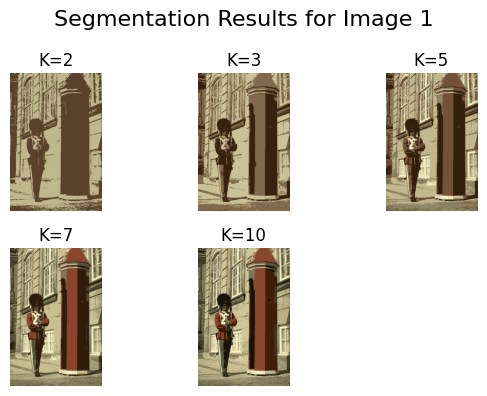

Visualizing segmentation results for image 2/10...


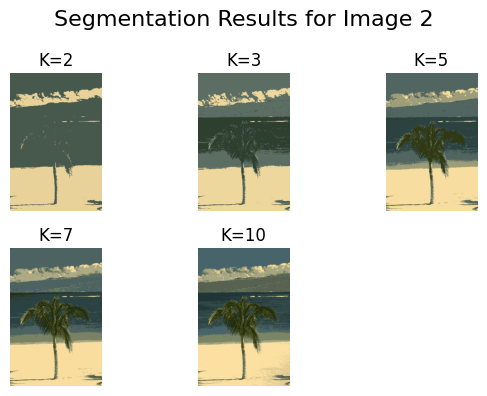

Visualizing segmentation results for image 3/10...


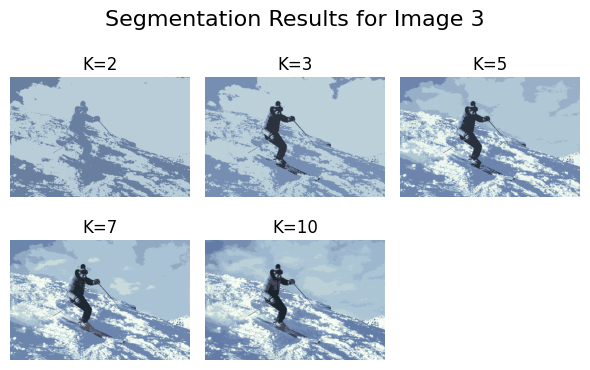

Visualizing segmentation results for image 4/10...


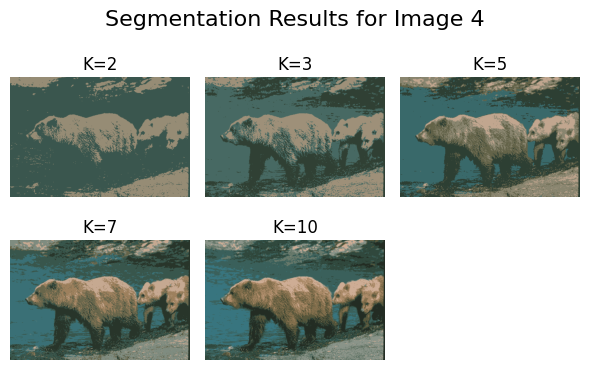

Visualizing segmentation results for image 5/10...


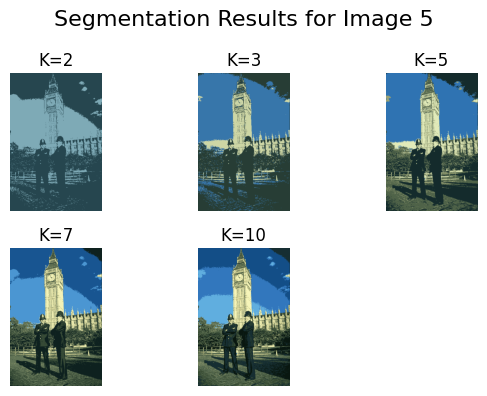

Visualizing segmentation results for image 6/10...


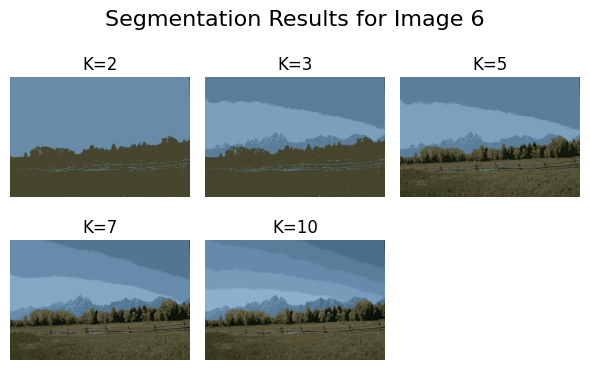

Visualizing segmentation results for image 7/10...


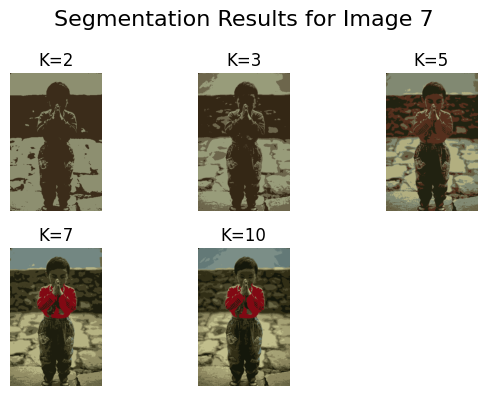

Visualizing segmentation results for image 8/10...


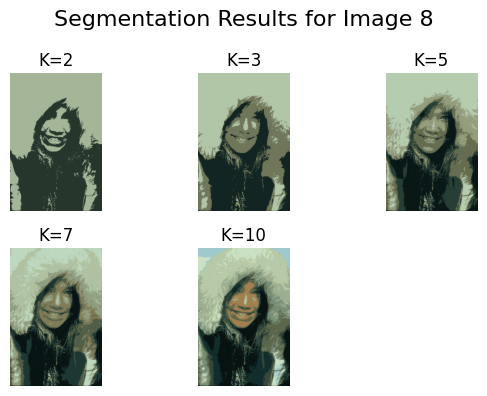

Visualizing segmentation results for image 9/10...


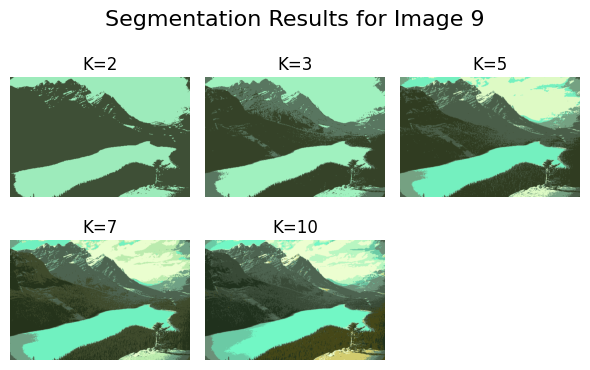

Visualizing segmentation results for image 10/10...


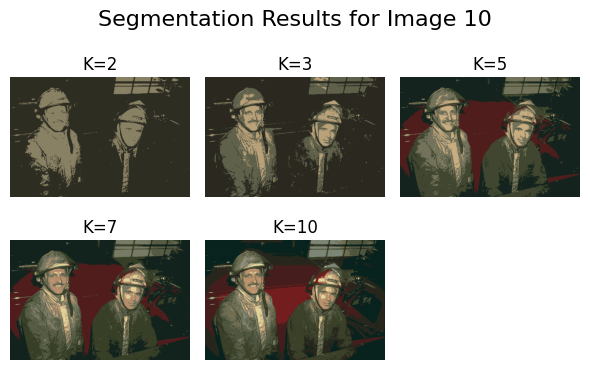

In [8]:
for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    print(f"Visualizing segmentation results for image {idx + 1}/{len(images_normalized)}...")

    # Set up a figure for visualization
    plt.figure(figsize=(6, 4))

    for i, k in enumerate(k_values):
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        # Reconstruct the image using the clustered labels
        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)

        # Plot the segmented image
        plt.subplot(2, len(k_values) // 2 + 1, i + 1)
        plt.imshow(reconstructed_image)
        plt.title(f"K={k}")
        plt.axis("off")

    # Display the segmentation results for the current image
    plt.suptitle(f"Segmentation Results for Image {idx + 1}", fontsize=16)
    plt.tight_layout()
    plt.show()

**Plot BDE Scores for Different K Values**

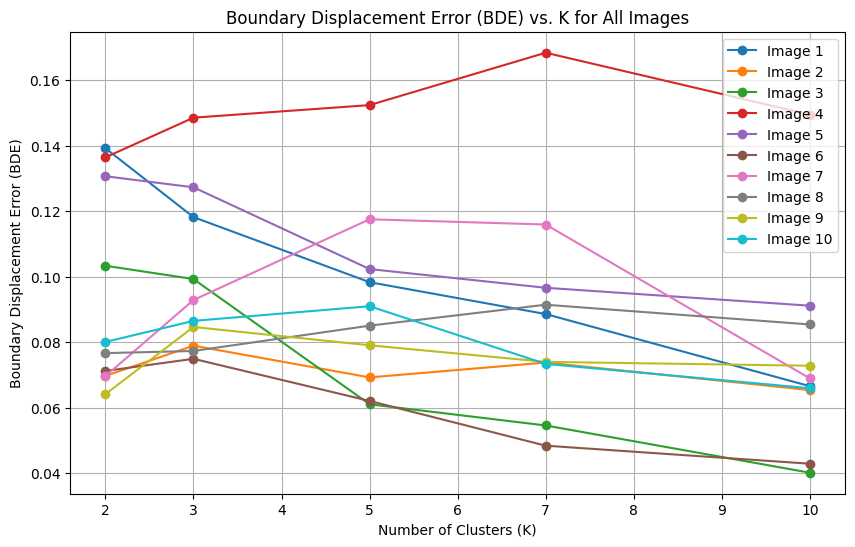

In [9]:
# Plot the BDE scores for different K values across all images
plt.figure(figsize=(10, 6))

for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    bde_scores = []

    for k in k_values:
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        # Reconstruct the image using the clustered labels
        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)

        # Calculate the BDE for the current K
        bde = calculate_bde(image_normalized, reconstructed_image)
        bde_scores.append(bde)

    # Plot the BDE scores for the current image
    plt.plot(k_values, bde_scores, marker='o', linestyle='-', label=f"Image {idx + 1}")

plt.title("Boundary Displacement Error (BDE) vs. K for All Images")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Boundary Displacement Error (BDE)")
plt.legend()
plt.grid(True)
plt.show()

**(2) How does the choice of K affect the segmentation results?**

- Low K (e.g., 2-3): Results in coarse segmentation, grouping large regions with similar colors. Important details may be lost.

- Moderate K (e.g., 5-7): Captures finer details while maintaining meaningful segmentation.

- High K (e.g., 10+): Over-segmentation, where small regions are treated as separate clusters, increasing noise and computation time.


**(3) What are the limitations of using K-Means for image segmentation?**

- **Euclidean Distance Issue** : Assumes spherical clusters, which may not align with real object boundaries.

- **Fixed K** : Requires pre-defining K, but the optimal value varies for different images.

- **Sensitive to Initialization** : Different runs can yield different segmentations due to random centroid placement.

- **Ignores Spatial Information** : Does not consider pixel relationships, leading to noisy segmentation.

- **Poor for Textured Regions** : Struggles to differentiate textures and gradual color changes.

**Better Alternatives:** GMM, Mean-Shift, GrabCut, Watershed, or Deep Learning (U-Net, Mask R-CNN).